In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is D40E-5628

 Directory of C:\Users\admin\Desktop\PythonProjects\Boston_Crimes

18-09-2019  15:33    <DIR>          .
18-09-2019  15:33    <DIR>          ..
18-09-2019  14:49    <DIR>          .ipynb_checkpoints
04-09-2018  17:56        57,969,510 crime.csv
04-09-2018  17:56            19,406 offense_codes.csv
18-09-2019  15:33           104,626 Untitled.ipynb
               3 File(s)     58,093,542 bytes
               3 Dir(s)  46,024,019,968 bytes free


In [4]:
crime_data = pd.read_csv('crime.csv', encoding = "ISO-8859-1")
offense_codes = pd.read_csv('offense_codes.csv', encoding = "ISO-8859-1")

In [5]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [6]:
crime_data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [7]:
crime_data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


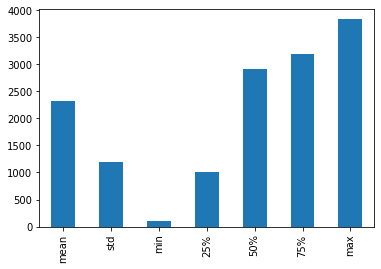

In [8]:
crime_data.describe().drop('count')['OFFENSE_CODE'].plot(kind='bar')
plt.show()

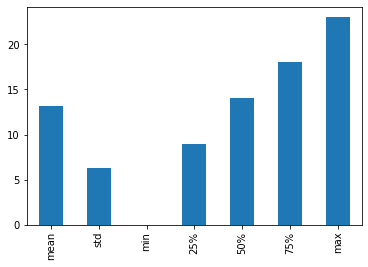

In [9]:
crime_data.describe().drop('count')['HOUR'].plot(kind='bar')
plt.show()

Let's have a look at the crime data :

In [10]:
crime_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


Let's check all the offense codes provided in the other dataframe:


In [11]:
offense_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 2 columns):
CODE    576 non-null int64
NAME    576 non-null object
dtypes: int64(1), object(1)
memory usage: 9.1+ KB


In [12]:
offense_codes.columns

Index(['CODE', 'NAME'], dtype='object')

In [13]:
offense_codes.head()

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


These are the offense codes and their names, however, we can see that the crime_data also contains the offense codes and their names, so we don't need this dataframe :


In [14]:
offense_codes['NAME'][offense_codes['CODE'] == 619]

161           LARCENY ALL OTHERS
312    LARCENY OTHER $200 & OVER
Name: NAME, dtype: object

In [15]:
crime_data['OFFENSE_DESCRIPTION'][crime_data['OFFENSE_CODE'] == 619]

0                LARCENY ALL OTHERS
45               LARCENY ALL OTHERS
110              LARCENY ALL OTHERS
150              LARCENY ALL OTHERS
205              LARCENY ALL OTHERS
                    ...            
318911    LARCENY OTHER $200 & OVER
318983    LARCENY OTHER $200 & OVER
318993    LARCENY OTHER $200 & OVER
319026           LARCENY ALL OTHERS
319048    LARCENY OTHER $200 & OVER
Name: OFFENSE_DESCRIPTION, Length: 5970, dtype: object

Therefore we will go ahead and delete this dataframe :


In [16]:
del(offense_codes)

Now we can go ahead and start working with the crime data :

In [17]:
crime_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


There are certain columns which are unique and are not needed to conduct data analysis such as the INCIDENT_NUMBER. Moreover, there are columms which are duplicates and unnecessary, such as OCCURED_ON_DATE, as YEAR, MONTH, DAY and TIME are already given. Therefore, we will go ahead and delete them :


In [18]:
crime_data = crime_data.drop(columns=['INCIDENT_NUMBER','OCCURRED_ON_DATE'])

In [19]:
crime_data.head()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,1402,Vandalism,VANDALISM,C11,347,NaN,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [20]:
crime_data.isnull()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
319069,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
319070,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
319071,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


We can see that the SHOOTING column contains null values, hence we need to fill the null values with some other data. If shooting has occured, the SHOOTING column contains a 'Y', therefore we can go ahead and fill the missing null values with 'N'. 

In [21]:
crime_data.fillna('N', inplace=True)

In [22]:
crime_data['SHOOTING'].describe()

count     319073
unique         2
top            N
freq      318054
Name: SHOOTING, dtype: object

In [23]:
crime_data['SHOOTING'].value_counts()

N    318054
Y      1019
Name: SHOOTING, dtype: int64

Let us visualize the distribution of the SHOOTING column for the data :

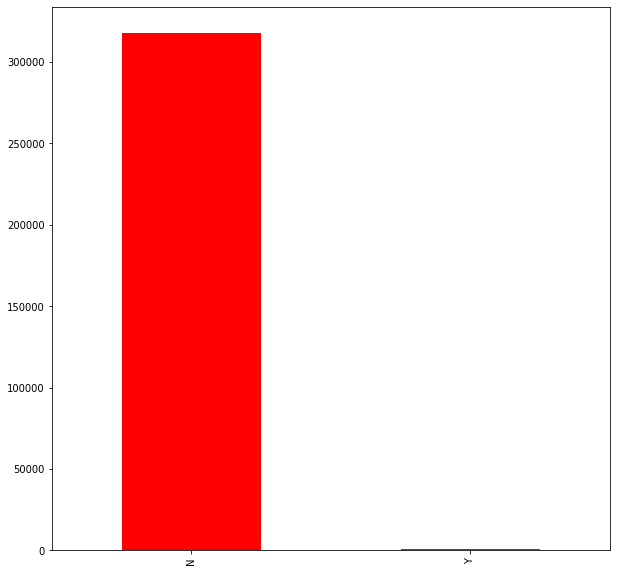

In [24]:
crime_data['SHOOTING'].value_counts().plot(kind='bar', color="red", figsize=(10,10))

We can see that there are very few cases where a shooting occured in this dataset.

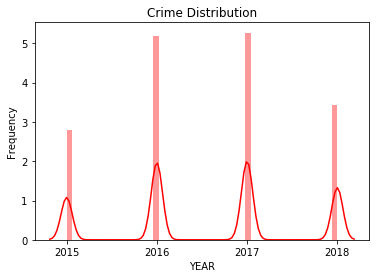

In [93]:
sns.distplot(crime_data['YEAR'], color="red")
plt.ylabel('Frequency')
plt.title('Crime Distribution')
plt.xticks(list(range(2015,2019,1)))
plt.show()

We can see that more crimes occured in 2016 and 2017, gradually decreasing by 2018

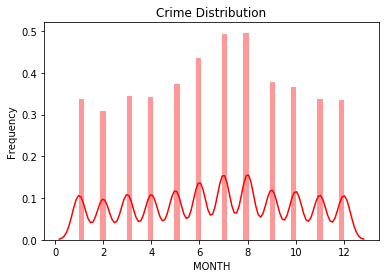

In [26]:
sns.distplot(crime_data['MONTH'], color="red")
plt.ylabel('Frequency')
plt.title('Crime Distribution')
plt.show()

The maximum number of crimes occured in July and August (7th and 8th Month)

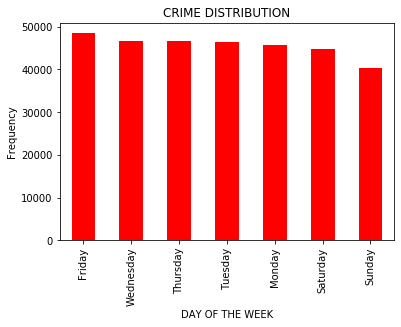

In [30]:
crime_data['DAY_OF_WEEK'].value_counts().plot(kind='bar', color='red')
plt.ylabel('Frequency')
plt.xlabel('DAY OF THE WEEK')
plt.title('CRIME DISTRIBUTION')
plt.show()

We can see the number of crimes were relatively similar on all days, however, the most crimes occured on a Friday, whereas the least occured on a Sunday.

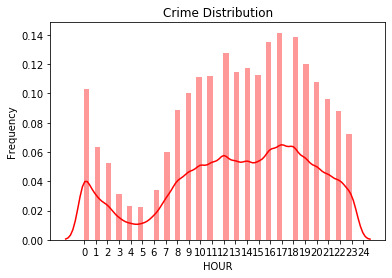

In [46]:
sns.distplot(crime_data['HOUR'], color="red")
plt.ylabel('Frequency')
plt.title('Crime Distribution')
plt.xticks(list(range(25)), np.arange(0,25,1))
plt.show()

It can be observed that the no. of crimes are mostly higher in the evenings compared to the rest of the day.

Let us see which is the most frequently occuring offence in this dataset : 

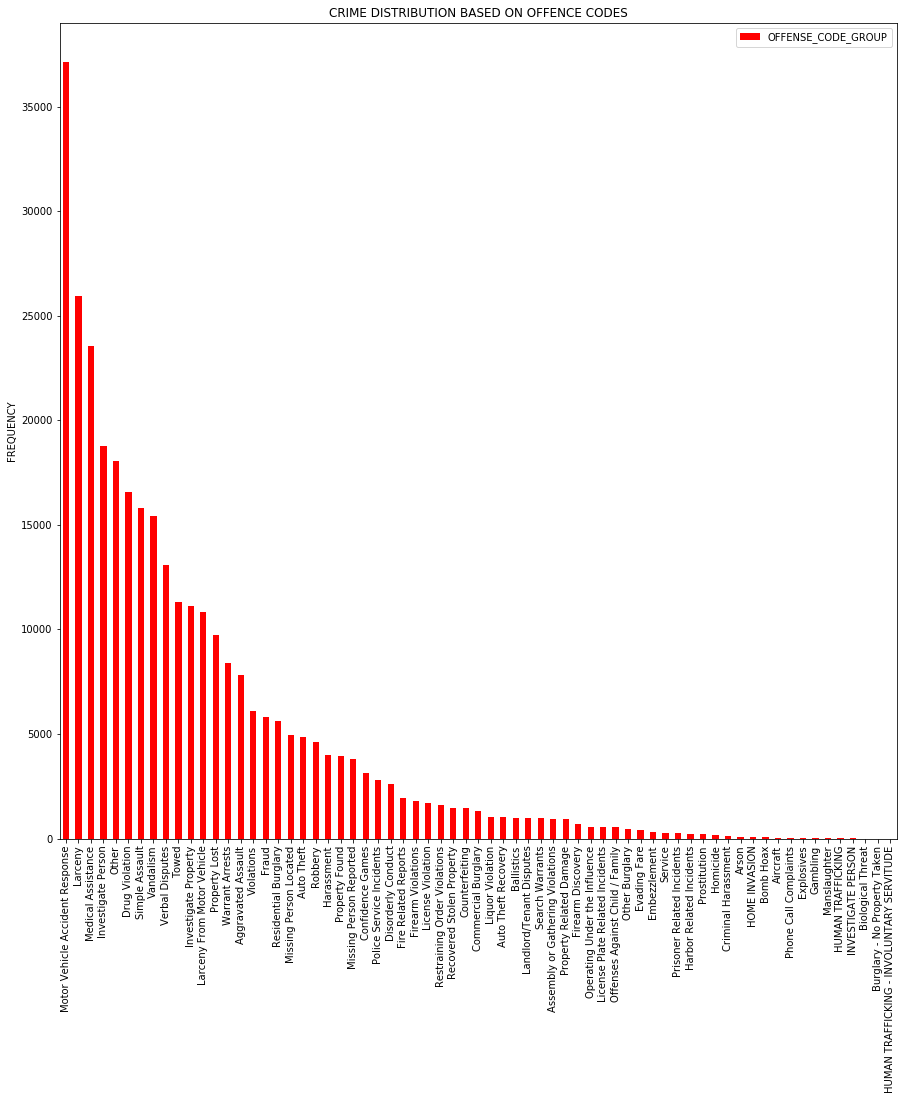

In [54]:
fig = plt.figure(figsize=(15,15))
plt.title('CRIME DISTRIBUTION BASED ON OFFENCE CODES')
plt.ylabel('FREQUENCY')
crime_data['OFFENSE_CODE_GROUP'].value_counts().plot(kind='bar', color='red')
plt.legend()
plt.show()

It can be observed that the Motor Vehicle Accident Response was the most frequently observed incident that took place, 2nd was Larceny and the 3rd was Medical Assistance. The least frequent were Human Trafficking and Burglary.

Let us visualize which district experienced the most offences:

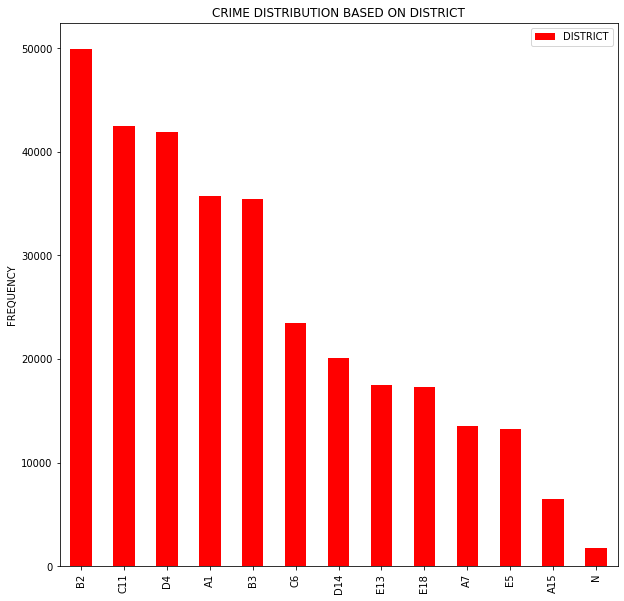

In [57]:
fig = plt.figure(figsize=(10,10))
plt.title('CRIME DISTRIBUTION BASED ON DISTRICT')
plt.ylabel('FREQUENCY')
crime_data['DISTRICT'].value_counts().plot(kind='bar', color='red')
plt.legend()
plt.show()

It is clear that magnitude of B2 is significantly higher than the other districts, with A15 experiencing the least incidents.

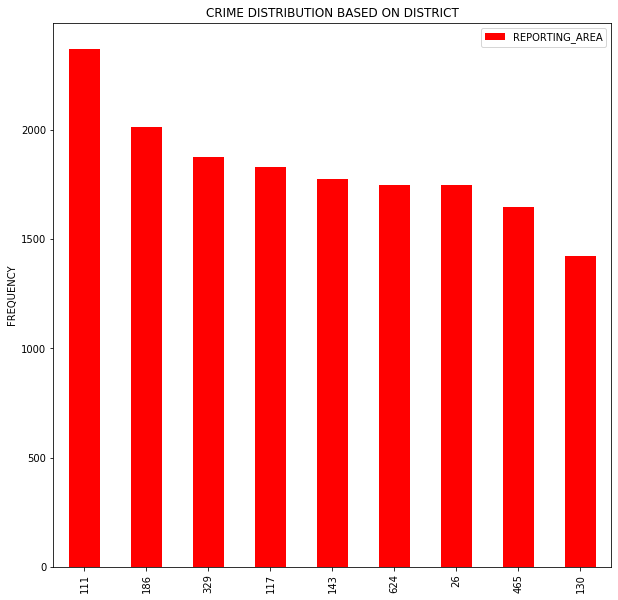

In [67]:
fig = plt.figure(figsize=(10,10))
plt.title('CRIME DISTRIBUTION BASED ON DISTRICT')
plt.ylabel('FREQUENCY')
crime_data['REPORTING_AREA'].value_counts()[1:10].plot(kind='bar', color='red')
plt.legend()
plt.show()

These are the areas where the highest number of incidents are reported, with 111 being the area with most reports. 

In [70]:
crime_data['STREET'][crime_data['STREET'] == 'N']

15        N
25        N
39        N
40        N
41        N
         ..
318811    N
318812    N
319015    N
319016    N
319017    N
Name: STREET, Length: 10871, dtype: object

N doesn't really seem to look like a good label for the streets which have not been reported. Let us replace N with the string 'Unknown'

In [82]:
crime_data['STREET'] = crime_data['STREET'].replace('N','UNKNOWN')

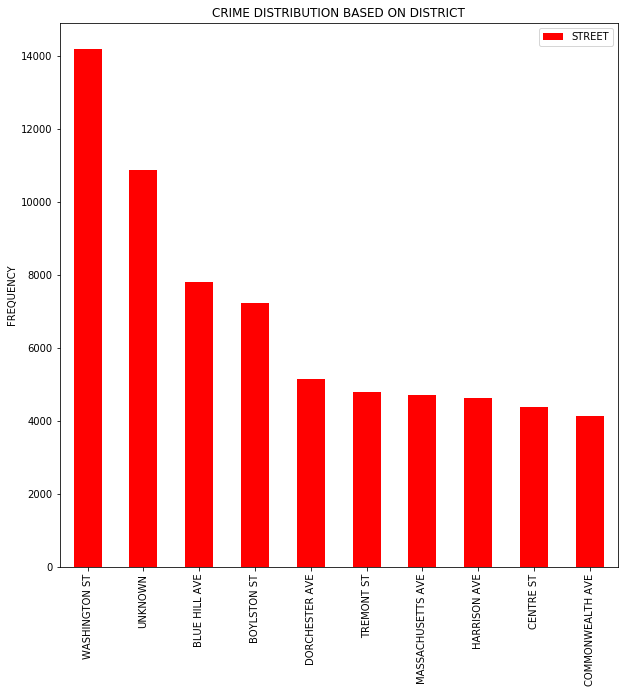

In [85]:
fig = plt.figure(figsize=(10,10))
plt.title('CRIME DISTRIBUTION BASED ON DISTRICT')
plt.ylabel('FREQUENCY')
crime_data['STREET'].value_counts()[:10].plot(kind='bar', color='red')
plt.legend()
plt.show()

These are the top 10 streets where the highest number of incidents have taken place. Here, 'UNKNOWN' label has been used for columns where no street was mentioned. WASHINGTON ST experienced the highest number of incidents in this dataset

In [101]:
crime_data_new = pd.read_csv('crime.csv', encoding = "ISO-8859-1")

In [102]:
crime_data_new.Lat.replace(-1, None, inplace=True)
crime_data_new.Long.replace(-1, None, inplace=True)

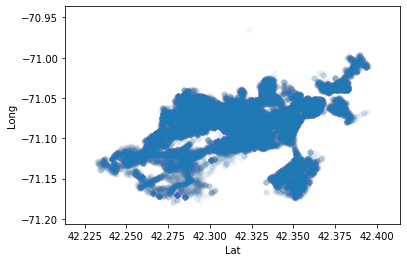

In [104]:
sns.scatterplot(x='Lat',
               y='Long',
                alpha=0.01,
               data=crime_data_new)
plt.show()

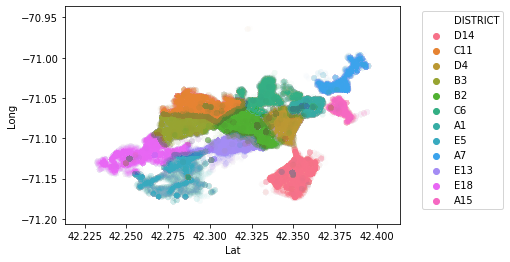

In [108]:
sns.scatterplot(x='Lat',
               y='Long',
                hue='DISTRICT',
                alpha=0.01,
               data=crime_data_new)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()